In [23]:
import pandas as pd
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
%matplotlib inline
import numpy as np
import pingouin as pg

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
experiment = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-serebrjakov/Stat_4/experiment_lesson_4.csv')

In [3]:
experiment.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [4]:
experiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20196 entries, 0 to 20195
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          20196 non-null  int64  
 1   delivery_time     20196 non-null  float64
 2   district          20196 non-null  object 
 3   experiment_group  20196 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 631.2+ KB


In [5]:
experiment.shape

(20196, 4)

In [14]:
#display distribution graphs by groups

,district,NaN
0,Central,"[[AxesSubplot(0.125,0.125;0.336957x0.755), Axe..."
1,Purlieus,"[[AxesSubplot(0.125,0.125;0.336957x0.755), Axe..."
2,Suburb,"[[AxesSubplot(0.125,0.125;0.336957x0.755), Axe..."


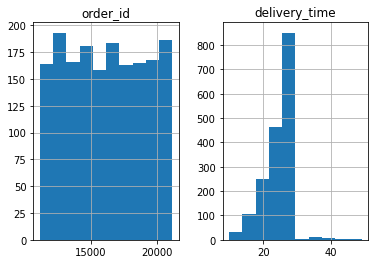

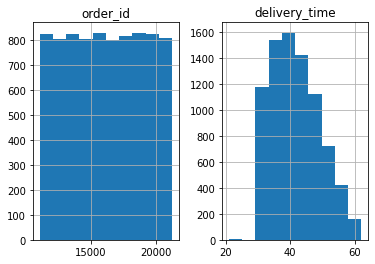

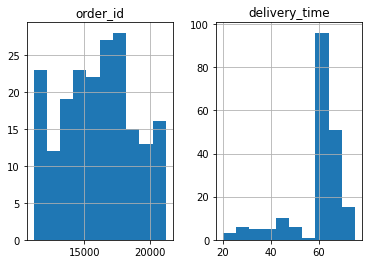

In [15]:
experiment.query("experiment_group == 'test'").groupby('district', as_index = False).hist()

,district,NaN
0,Central,"[[AxesSubplot(0.125,0.125;0.336957x0.755), Axe..."
1,Purlieus,"[[AxesSubplot(0.125,0.125;0.336957x0.755), Axe..."
2,Suburb,"[[AxesSubplot(0.125,0.125;0.336957x0.755), Axe..."


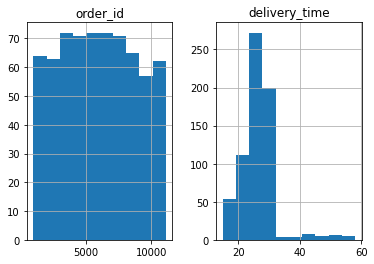

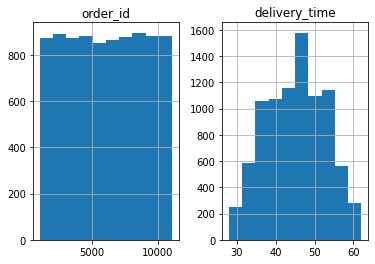

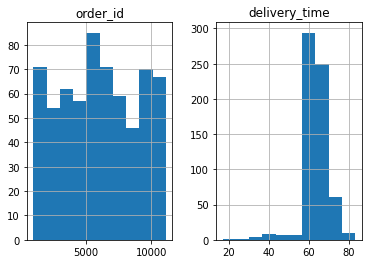

In [16]:
experiment.query("experiment_group == 'control'").groupby('district', as_index = False).hist()

In [17]:
#Calculate the number of observations of the control and test groups and their difference

In [18]:
df = experiment.pivot(index = ['order_id', 'district'], columns = 'experiment_group', values = 'delivery_time').reset_index()
df.fillna(0).head()

experiment_group,order_id,district,control,test
0,1000,Purlieus,42.0,0.0
1,1001,Purlieus,47.0,0.0
2,1002,Suburb,63.0,0.0
3,1003,Purlieus,35.0,0.0
4,1004,Purlieus,48.0,0.0


In [19]:
test_cnt = df.test.count()
test_cnt

10104

In [20]:
control_cnt = df.control.count()
control_cnt

10092

In [21]:
test_cnt - control_cnt

12

In [25]:
#normal distribution test and standard deviation calculation

In [24]:
pg.normality(data = experiment, dv = "delivery_time", 
                   group = "experiment_group", method = "normaltest")

,W,pval,normal
control,0.253498,0.880955,True
test,7.024157,0.029835,False


In [28]:
df.test.std().round(2)

9.88

In [29]:
df.control.std().round(2)

9.99

In [30]:
#Calculate p-value and run t-test

In [33]:
ttest_ind(experiment[experiment.experiment_group == 'test'].delivery_time, 
         experiment[experiment.experiment_group == 'control'].delivery_time)

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

In [32]:
#Calculate the percentage change in the average delivery time in the test group compared to the control group

In [41]:
x = experiment.query("experiment_group == 'test'").delivery_time.mean()
x

39.04681314330958

In [42]:
y = experiment.query("experiment_group == 'control'").delivery_time.mean()
y

45.065101070154576

In [48]:
precent = 100 - (x / y * 100)
precent.round(2)

13.35

In [49]:
#Conclusion: we launch a new algorithm for everyone, since the average delivery time has changed statistically significantly
#The average delivery time in the test is less than in the control